## **üßø Praktikum 1**

Klasifikasi SVM dengan Data Dummy

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

**Penjelasan :**

Kode di atas mengimport model, dimana model stats yang digunakan merupakan generative model untuk mmenentukan label pada poin baru karena dimanfaatkan untuk statistik dan uji hipotesis, serta distribusi probabilitas. library numpy digunakan komputasi numerik dengan bentuk array multidimensi, sedangkan matplotlib dan sns untuk visualisasi data

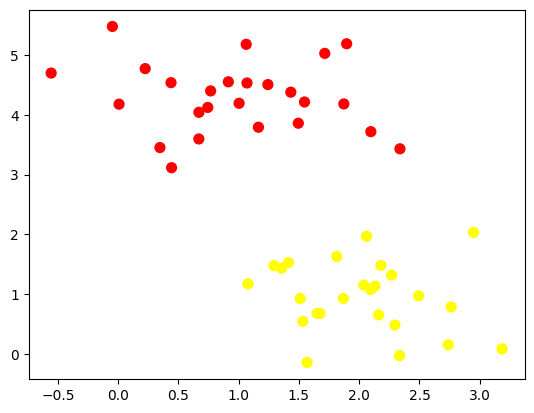

In [60]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

**Penjelasan :**

Make_blobs digunakan untuk menghasilkan dataset dengan bentuk yang mudah dikendalikan, cocok untuk pengujian algoritma pembelajaran mesin dan visualisasi. kode di atas merupakan kode untuk pembuatan data dummy 2D (generative model) dimana terdapat beberapa parameter, yaitu :

*   n_samples=50: Jumlah total sampel yang dihasilkan adalah 50
*   centers=2: Data akan dibagi menjadi 2 cluster (kelas).
*   random_state=0: Menetapkan nilai acak untuk memastikan reproducibility hasil.
*   cluster_std=0.60: Mengatur deviasi standar cluster. Ini mempengaruhi seberapa tersebar data dalam setiap cluster.

plt.scatter digunakan untuk mememetakan/memvisualisasikan data dummy yang sudah dibuat pada sumbu yang sesuai.

(-1.0, 3.5)

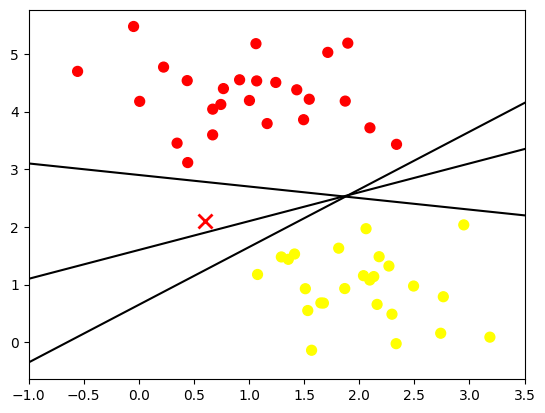

In [61]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

**Penjelasan :**

1.   `xfit = np.linspace(-1, 3.5)` untuk membuat array xfit yang berisi nilai-nilai yang terdistribusi secara merata dari -1 hingga 3.5. Array ini akan digunakan sebagai sumbu x untuk menggambar garis.
2.   `plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')` digunakan untuk menggambar scatter plot (grafik sebar) dari data yang telah dihasilkan sebelumnya, oleh make_blobs
3.   `plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)` untuk menggambar satu titik merah berbentuk 'X' di koordinat (0.6, 2.1) dengan tepi yang lebih tebal (width 2) dan ukuran 10.
4.   `for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]` berisi loop yang akan menggambar beberapa garis dengan kemiringan (m) dan intercept (b) yang berbeda, yang merepresentasikan gradien dan titik potong y dari garis lurus. jumlah dari garis yang terbentuk ada 3
5.   `plt.plot(xfit, m * xfit + b, '-k')` di dalam loop, untuk setiap pasangan m dan b (titik potong), kode ini menggambar garis lurus. Persamaan garis yang digunakan adalah y=mx+b, di mana xfit adalah sumbu x yang sudah dibuat sebelumnya dan -k menentukan gaya garis (garis solid berwarna hitam).
6.   `plt.xlim(-1, 3.5)` untuk menetapkan batas sumbu x pada grafik dari -1 hingga 3.5.

(-1.0, 3.5)

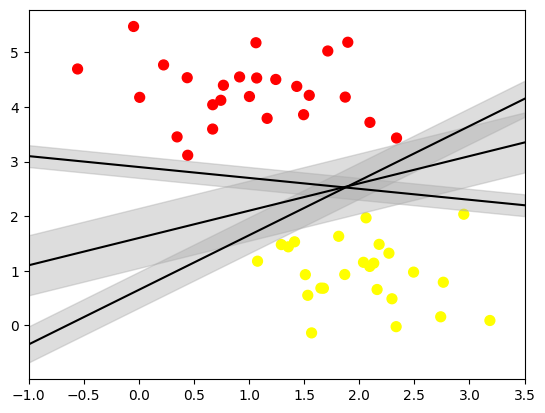

In [62]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

**Penjelasan :**

Terdapat penambahan fitur untuk menampilkan daerah kepercayaan (confidence interval) untuk setiap garis regresi linear.
1.   `xfit = np.linspace(-1, 3.5)` untuk membuat array xfit yang berisi nilai-nilai yang terdistribusi secara merata dari -1 hingga 3.5. Array ini akan digunakan sebagai sumbu x untuk menggambar garis.
2.   `plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')` untuk membuat plot sebar untuk titik data seperti sebelumnya.
Menggambar Garis dan Area Bayangan:
3.   `for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]` digunakan untuk menggambar beberapa garis, di mana m adalah kemiringan, b adalah intercept, dan d adalah jarak dari garis ke batas area bayangan.
4.   `yfit = m * xfit + b` menghitung nilai Y untuk setiap titik X menggunakan persamaan garis.
5.   `plt.plot(xfit, yfit, '-k')` menggambar garis dengan warna hitam.
6.   `plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)` untuk menambahkan area bayangan di sekitar garis. dimana `yfit - d dan yfit + d` menentukan batas bawah dan atas dari area yang diisi. kode `color='#AAAAAA'` dan `alpha=0.4` memberikan warna abu-abu dengan transparansi 40%.
7.   `plt.xlim(-1, 3.5)` untuk mengatur batas sumbu X dari -1 hingga 3.5 agar semua elemen plot tetap terlihat.

Kode ini menghasilkan visualisasi yang lebih informatif dengan menampilkan daerah kepercayaan untuk setiap garis regresi. Daerah kepercayaan ini memberikan gambaran tentang ketidakpastian dalam model regresi, sehingga membantu dalam interpretasi hasil.



**Penerappan fitting SVM**

In [63]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

Kode diatas menggunakan SVC dari sklearn untuk membangun model klasifikasi. `model = SVC(kernel='linear', C=1E10)` merupakan kode untuk menciptakan objek model SVC dengan parameter berikut:

*   kernel='linear' untuk menentukan fungsi kernel yang akan digunakan yaitu kernel linear, model akan mencoba menemukan garis lurus (atau hyperplane) yang memisahkan kelas-kelas data.
*   C=1E10 parameter regulasi yang sangat besar. nilai C yang besar berarti model akan memberikan toleransi semakin sedikit terhadap kesalahan klasifikasi, namun berisiko overfitting.

`model.fit(X, y)` merupakan kode untuk melatih model menggunakan data fitur X dan label kelas y. Model akan belajar untuk memisahkan kelas-kelas berdasarkan data yang diberikan.

Dengan kode ini, akan didapatkan model SVM yang telah dilatih untuk mengklasifikasikan data berdasarkan fitur yang dihasilkan oleh make_blobs. Setelah model dilatih, model dapat digunakan untuk memprediksi kelas dari data baru atau untuk menganalisis batas keputusan yang dihasilkan.

In [64]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

**Penjelasan :**

Fungsi (`plot_svc_decision_function`) digunakan untuk menampilkan batas keputusan dan support vectors dari model Support Vector Classifier (SVC)

**1. Parameter Fungsi**:
   - `model`: Model SVC yang sudah dilatih.
   - `ax`: Sumbu matplotlib untuk menggambar. Jika tidak diberikan, akan menggunakan sumbu saat ini (`plt.gca()`).
   - `plot_support`: Boolean untuk menentukan apakah support vectors akan ditampilkan.

**2. Mendapatkan Batas Sumbu**:
   - `xlim = ax.get_xlim()`: Mengambil batas sumbu X saat ini.
   - `ylim = ax.get_ylim()`: Mengambil batas sumbu Y saat ini.

**3. Membuat Grid**:
   - `np.linspace(xlim[0], xlim[1], 30)` dan `np.linspace(ylim[0], ylim[1], 30)`: Membuat 30 titik linier untuk sumbu X dan Y.
   - `np.meshgrid(y, x)`: Membuat grid dari titik-titik tersebut.
   - `xy = np.vstack([X.ravel(), Y.ravel()]).T`: Menggabungkan koordinat grid menjadi format yang sesuai untuk evaluasi model.

**4. Evaluasi Model**:
   - `P = model.decision_function(xy).reshape(X.shape)`: Menghitung nilai fungsi keputusan untuk setiap titik dalam grid. Nilai ini akan digunakan untuk menentukan batas keputusan.

**5. Plot Batas dan Margin**:
   - `ax.contour(...)`: Menggambar kontur batas keputusan dan margin menggunakan level [-1, 0, 1]:
     - Level 0 menunjukkan batas keputusan.
     - Level -1 dan 1 menunjukkan margin.
     - `linestyles=['--', '-', '--']` memberikan gaya garis yang berbeda.

**6. Plot Support Vectors**:
   - Jika `plot_support` adalah `True`, maka akan menampilkan support vectors:
     - `ax.scatter(...)`: Menampilkan support vectors dengan ukuran besar dan tanpa warna latar belakang (facecolors='none').

**7. Mengatur Batas Sumbu**:
   - `ax.set_xlim(xlim)` dan `ax.set_ylim(ylim)`: Mengatur batas sumbu kembali agar sesuai dengan nilai awal.

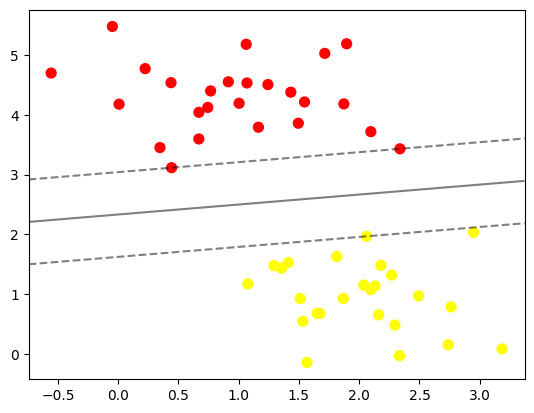

In [65]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

Untuk menampilkan plot yang berisi titik data serta batas keputusan dari model Support Vector Classifier (SVC) yang sudah dilatih

1. **Plot Titik Data**:
   - `plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')`: Ini akan membuat plot sebar dari titik data yang telah dihasilkan sebelumnya. Titik-titik ini akan diwarnai sesuai dengan kelasnya (`y`), dengan ukuran 50 dan menggunakan palet warna "autumn".

2. **Menampilkan Batas Keputusan**:
   - `plot_svc_decision_function(model)`: Memanggil fungsi yang telah kamu buat untuk menggambar batas keputusan dan margin dari model SVC. Fungsi ini akan menampilkan:
     - Garis batas keputusan (yang memisahkan kelas-kelas).
     - Garis margin (di mana support vectors berada).
     - Titik support vectors itu sendiri.

In [66]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

`model.support_vectors_` adalah atribut dari model Support Vector Classifier (SVC) yang menyimpan koordinat dari support vectors, yaitu titik data yang berada paling dekat dengan garis batas keputusan (decision boundary). Support vectors adalah elemen kunci dalam algoritma SVM karena mereka membantu menentukan posisi dari hyperplane yang memisahkan kelas-kelas.

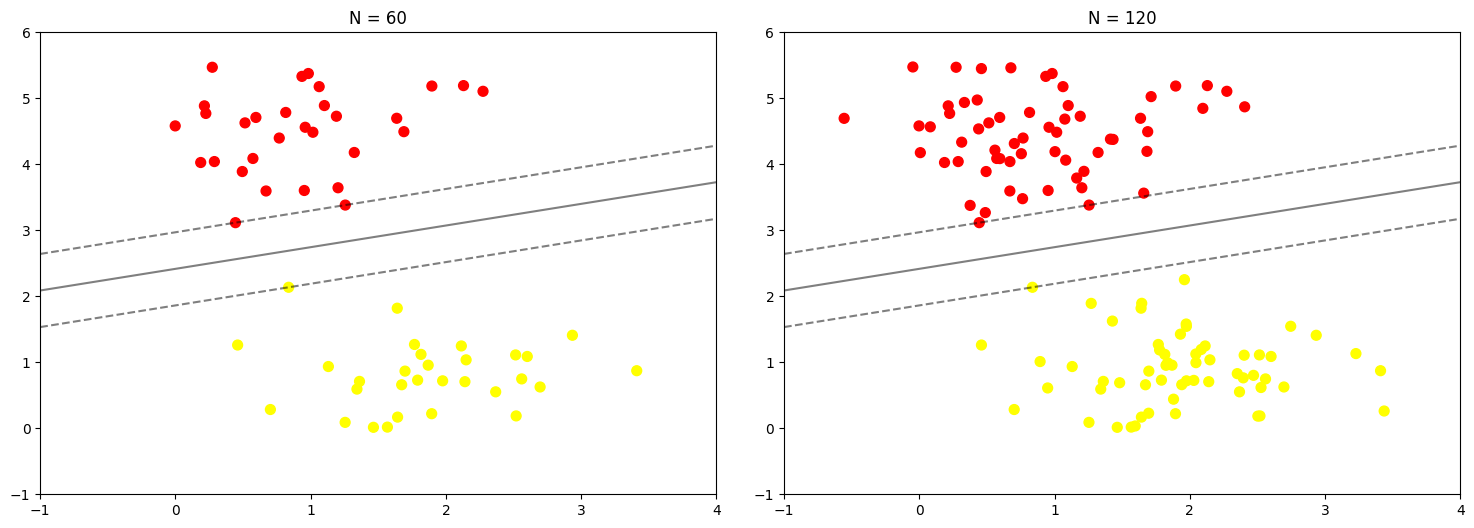

In [67]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

Kode yang kamu buat berfungsi untuk menggambarkan hasil model Support Vector Classifier (SVC) dengan jumlah titik data yang berbeda. Berikut adalah penjelasan rinci tentang setiap bagian dari kode tersebut:

**Penjelasan Fungsi `plot_svm`**

1. **Parameter Fungsi**:
   - `N`: Jumlah sampel yang ingin digunakan untuk pelatihan. Secara default, diatur ke 10.
   - `ax`: Sumbu matplotlib untuk menggambar. Jika tidak diberikan, akan menggunakan sumbu saat ini (`plt.gca()`).

2. **Membuat Dataset**:
   - `X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)`: Menghasilkan dataset dengan 200 titik dan 2 pusat.
   - `X = X[:N]` dan `y = y[:N]`: Memilih hanya `N` titik pertama dari dataset untuk digunakan.

3. **Melatih Model SVC**:
   - `model = SVC(kernel='linear', C=1E10)`: Membuat model SVC dengan kernel linear dan parameter regulasi yang sangat besar.
   - `model.fit(X, y)`: Melatih model menggunakan titik data yang telah dipilih.

4. **Plotting**:
   - `ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')`: Membuat plot sebar dari titik data dengan warna sesuai kelas.
   - `ax.set_xlim(-1, 4)` dan `ax.set_ylim(-1, 6)`: Mengatur batas sumbu X dan Y.
   - `plot_svc_decision_function(model, ax)`: Memanggil fungsi yang sudah dibuat sebelumnya untuk menggambar batas keputusan dan support vectors.

**Menampilkan Beberapa Plot**

1. **Membuat Figure dan Subplot**:
   - `fig, ax = plt.subplots(1, 2, figsize=(16, 6))`: Membuat figure dengan 2 subplot (1 baris, 2 kolom).
   - `fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)`: Mengatur jarak antara subplot.

2. **Loop untuk Menggambar SVM**:
   - `for axi, N in zip(ax, [60, 120])`: Melakukan iterasi untuk setiap subplot, menggambar model SVM dengan 60 dan 120 titik data.
   - `plot_svm(N, axi)`: Memanggil fungsi `plot_svm` untuk masing-masing subplot.
   - `axi.set_title('N = {0}'.format(N))`: Memberikan judul pada setiap subplot yang menunjukkan jumlah titik data yang digunakan.


**Data Tidak Terpisah Secara Linier**

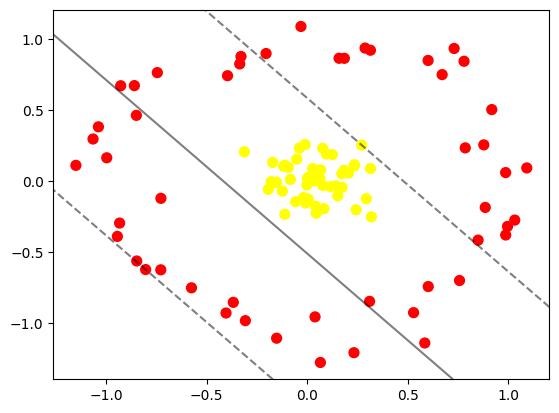

In [68]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Berdasarkan kode di atas, dataset yang tidak dapat dipisahkan secara linear dengan menggunakan `make_circles`

1. **Membuat Dataset**:
   - `from sklearn.datasets import make_circles`: Mengimpor fungsi `make_circles` untuk membuat dataset berbentuk lingkaran.
   - `X, y = make_circles(100, factor=.1, noise=.1)`: Menghasilkan 100 titik data yang membentuk dua lingkaran konsentris.
     - `factor=.1`: Mengatur ukuran lingkaran dalam proporsi. Lingkaran yang lebih kecil akan memiliki radius 10% dari yang lebih besar.
     - `noise=.1`: Menambahkan sedikit noise untuk menciptakan variasi dalam data.

2. **Melatih Model SVC**:
   - `clf = SVC(kernel='linear').fit(X, y)`: Membuat model SVC dengan kernel linear dan melatihnya menggunakan dataset yang dihasilkan. Namun, karena data tidak dapat dipisahkan secara linear, model ini tidak akan dapat memisahkan dua kelas dengan baik.

3. **Plot Titik Data**:
   - `plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')`: Membuat plot sebar dari titik data, di mana warna titik menunjukkan kelasnya (`y`).

4. **Menampilkan Batas Keputusan**:
   - `plot_svc_decision_function(clf, plot_support=False)`: Memanggil fungsi yang sebelumnya kamu buat untuk menggambar batas keputusan. Dalam hal ini, karena data tidak terpisah secara linear, batas keputusan yang ditunjukkan akan tampak tidak efektif dalam memisahkan dua kelas.

Dengan menjalankan kode ini, kamu akan mendapatkan plot yang menunjukkan:

- Titik-titik data yang membentuk dua lingkaran konsentris.
- Garis batas keputusan yang ditentukan oleh model SVC. Karena model menggunakan kernel linear, garis batas ini tidak akan mampu memisahkan kedua kelas secara efektif, dan akan terlihat jelas bahwa data tidak terpisah dengan baik.

Dengan visualisasi ini, kamu dapat melihat bahwa model SVC dengan kernel linear tidak efektif untuk dataset yang tidak dapat dipisahkan secara linear, menunjukkan bahwa mungkin diperlukan kernel yang lebih kompleks (seperti RBF) untuk menangani data semacam ini.

In [69]:
r = np.exp(-(X ** 2).sum(1))

Variabel r akan berisi array 1D yang berisi nilai eksponensial dari nilai negatif dari jumlah kuadrat setiap titik data. Ini sering digunakan dalam konteks fungsi kernel, seperti dalam SVM dengan kernel Gaussian (RBF), di mana fungsi ini membantu menghitung jarak atau kemiripan antara titik data.

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide‚Ä¶

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 5.84859288e-01, -1.13762296e+00],
       [-3.12813486e-01,  2.05722869e-01],
       [-1.52219239e-01, -1.10403134e+00],
       [-1.17364703e-01,  1.04242916e-01],
       [ 1.43743051e-01, -3.40241302e-02],
       [ 7.75643371e-02, -3.13546188e-02],
       [ 2.94037188e-01, -1.23726841e-01],
       [-1.71658811e-01,  1.30944170e-01],
       [ 2.71159594e-01,  2.52449995e-01],
       [ 9.54594062e-02,  1.90189545e-01],
       [ 9.18149900e-01,  5.02246796e-01],
       [-1.93372102e-01, -5.79662485e-02],
       [ 9.87169181e-01,  5.94674622e-02],
       [ 1.09239617e+00,  9.22265455e-02],
       [-1.11314712e-01, -2.33362327e-01],
       [-9.41226643e-02,  9.59304237e-02],
       [-2.04751215e-01,  8.96123859e-01],
       [-9.44607236e-01, -3.88789261e-01],
       [-7.27933198e-01, -1.21335665e-01],
       [ 2.32496228e-01, -1.20580355e+00],
       [-3.12451426e-02,  1.08613275e+00],
       [-1.15091285e+00,  1.10399592e-01],
       [-3.29569426e-01,  8.75428799e-01],
       [-1.79228909e-01, -3.98811874e-03],
       [-3.35844899e-01,  8.23051334e-01],
       [ 5.29127357e-01, -9.24434364e-01],
       [-5.76812170e-02, -1.44765828e-01],
       [ 1.72029147e-01,  5.14641598e-02],
       [ 1.03241797e+00, -2.74245840e-01],
       [-4.04002814e-01, -9.27087741e-01],
       [-8.50060669e-01,  4.61693539e-01],
       [-1.52834285e-01, -8.26392079e-03],
       [-8.48201440e-01, -5.61520213e-01],
       [-1.58164751e-01, -1.03469709e-02],
       [-3.89503116e-02,  2.31926471e-01],
       [ 7.80070183e-01,  8.41726024e-01],
       [-8.36077085e-02,  1.12787215e-02],
       [ 7.22908260e-03,  2.76268869e-02],
       [ 1.25015965e-01,  1.85680865e-01],
       [-9.97393160e-01,  1.63531202e-01],
       [ 8.85669801e-01, -1.85218276e-01],
       [ 2.43317733e-01, -2.01720226e-01],
       [ 2.67856887e-02,  8.79650271e-02],
       [ 2.87930599e-01,  9.34329522e-01],
       [ 2.33369569e-01,  1.06416431e-01],
       [-1.88061026e-02, -1.16048598e-01],
       [ 8.78433423e-01,  2.54270167e-01],
       [ 1.58522870e-01,  8.62797830e-01],
       [ 3.34254766e-02,  6.21489848e-04],
       [-5.75849768e-01, -7.50051717e-01],
       [-3.07815358e-01, -9.80766272e-01],
       [ 3.78527352e-02,  1.52946588e-02],
       [ 4.22808951e-02, -1.77707540e-01],
       [-5.23398621e-02,  1.54156815e-01],
       [-7.28602991e-01, -6.23587790e-01],
       [ 7.86197462e-01,  2.33294994e-01],
       [ 2.05283810e-01,  5.59416870e-02],
       [-1.06560302e+00,  2.95532247e-01],
       [ 1.83178427e-01,  7.57965100e-02],
       [ 4.72297505e-03, -1.25960756e-01],
       [-1.11091751e-01,  1.11513957e-01],
       [ 6.55369496e-02, -1.27461350e+00],
       [ 1.73467883e-01, -4.46314848e-02],
       [ 9.96470662e-01, -3.18663992e-01],
       [ 6.71223397e-01,  7.47856278e-01],
       [ 2.34897643e-01,  1.14917948e-01],
       [ 3.82133303e-02,  2.82863907e-02],
       [-9.27945049e-01,  6.69758643e-01],
       [ 7.57705948e-01, -6.98697104e-01],
       [ 1.51837685e-01, -1.03459424e-01],
       [ 7.69096023e-02,  2.30194414e-01],
       [-3.96433151e-01,  7.40258179e-01],
       [ 7.30769586e-01,  9.31605305e-01],
       [ 3.14388595e-01,  9.19313020e-01],
       [-1.03887318e+00,  3.80998657e-01],
       [-7.49924619e-03, -1.54065422e-01],
       [ 3.19095905e-01, -2.51388479e-01],
       [ 6.01306604e-01,  8.47513126e-01],
       [ 8.50093782e-01, -4.14937488e-01],
       [ 1.16485661e-01, -3.88885062e-02],
       [ 8.28327180e-02, -1.94320912e-01],
       [ 8.39094677e-04,  1.74586376e-02],
       [ 3.88573818e-02, -9.54264949e-01],
       [ 4.49003078e-02, -2.25810282e-01],
       [ 9.87417425e-01, -3.78868454e-01],
       [ 6.02117216e-01, -7.41167697e-01],
       [-3.67842507e-01, -8.52018831e-01],
       [ 1.26686696e-02,  1.25596190e-02],
       [ 3.10235004e-01, -8.45062310e-01],
       [-8.59915706e-01,  6.70703514e-01],
       [ 6.68402712e-02,  7.83896020e-02],
       [ 1.84561672e-01,  8.62500983e-01

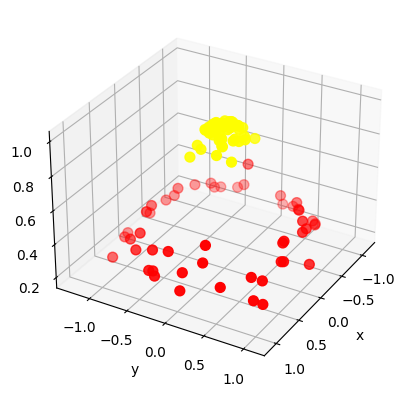

In [70]:
from ipywidgets import interact, fixed, IntSlider, Dropdown # Make sure to import interactive
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

Kode yang kamu tulis menggunakan `ipywidgets` untuk membuat antarmuka interaktif yang memungkinkan pengguna mengubah sudut pandang dari plot 3D.

1. **Import Libraries**:
   - `from ipywidgets import interact, fixed, IntSlider, Dropdown`: Mengimpor modul yang diperlukan untuk membuat antarmuka interaktif.
   - `from mpl_toolkits import mplot3d`: Mengimpor toolkit untuk membuat plot 3D di Matplotlib.

2. **Fungsi `plot_3D`**:
   - `def plot_3D(elev=30, azim=30, X=X, y=y)`: Mendefinisikan fungsi `plot_3D` yang menerima parameter:
     - `elev`: Elevasi sudut pandang (sudut vertikal).
     - `azim`: Azimuth sudut pandang (sudut horizontal).
     - `X`: Data fitur (koordinat x dan y).
     - `y`: Label kelas dari data.

3. **Membuat Plot 3D**:
   - `ax = plt.subplot(projection='3d')`: Membuat subplot 3D.
   - `ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')`: Menggambar titik-titik data dalam 3D:
     - `X[:, 0]` dan `X[:, 1]`: Koordinat x dan y.
     - `r`: Nilai z yang dihitung sebelumnya (seperti yang dijelaskan di jawaban sebelumnya).
     - `c=y`: Mengatur warna titik berdasarkan label kelas.
     - `s=50`: Ukuran titik.
     - `cmap='autumn'`: Palet warna yang digunakan.

4. **Mengatur Sudut Pandang**:
   - `ax.view_init(elev=elev, azim=azim)`: Mengatur sudut pandang berdasarkan nilai elevasi dan azimuth yang diberikan.

5. **Label Sumbu**:
   - `ax.set_xlabel('x')`, `ax.set_ylabel('y')`, `ax.set_zlabel('r')`: Memberikan label pada sumbu x, y, dan z.

6. **Interaktivitas**:
   - `interact(...)`: Membuat antarmuka interaktif untuk fungsi `plot_3D`:
     - `elev=[-90, 45, 30, 20, 10]`: Slider untuk mengubah elevasi sudut pandang.
     - `azip=(-180, 180)`: Slider untuk mengubah azimuth (perhatikan bahwa seharusnya `azim`, bukan `azip`).
     - `X=fixed(X)`, `y=fixed(y)`: Mengatur nilai `X` dan `y` sebagai tetap agar tidak bisa diubah oleh pengguna.

In [71]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

Kode yang kamu berikan melatih model Support Vector Classifier (SVC) menggunakan kernel Radial Basis Function (RBF).
1. **Membuat Model SVC**:
   ```python
   clf = SVC(kernel='rbf', C=1E6)
   ```
   - `SVC`: Ini adalah kelas dari pustaka `sklearn.svm` yang digunakan untuk membuat model Support Vector Classifier.
   - `kernel='rbf'`: Menggunakan kernel RBF, yang merupakan kernel non-linear. Kernel ini efektif untuk data yang tidak terpisah secara linier, seperti data yang membentuk pola non-linear.
   - `C=1E6`: Parameter regulasi `C` yang sangat besar, yang berarti model akan berusaha untuk menghindari kesalahan pada data pelatihan sebanyak mungkin. Nilai `C` yang tinggi dapat menyebabkan overfitting, tetapi dalam beberapa kasus bisa membantu memisahkan kelas dengan baik.

2. **Melatih Model**:
   ```python
   clf.fit(X, y)
   ```
   - `fit(X, y)`: Metode ini melatih model menggunakan data fitur `X` dan label kelas `y`. Model akan mencari hyperplane optimal untuk memisahkan dua kelas berdasarkan data yang diberikan.

Model SVC dengan kernel RBF sering digunakan dalam situasi di mana data tidak dapat dipisahkan secara linier. Kernel RBF bekerja dengan mengubah ruang fitur menjadi dimensi yang lebih tinggi, sehingga membuat pemisahan kelas menjadi lebih mungkin.

Dengan menjalankan kode ini, kamu akan mendapatkan visualisasi yang menunjukkan titik data dari dataset non-linear, bersama dengan batas keputusan yang ditentukan oleh model SVC dengan kernel RBF. Garis batas tersebut akan lebih kompleks, mencerminkan kemampuan model untuk menangani data yang tidak dapat dipisahkan secara linier.

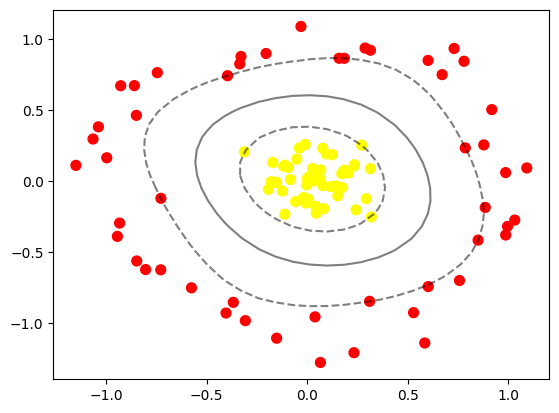

In [72]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

Kode yang kamu berikan berfungsi untuk memvisualisasikan hasil dari model Support Vector Classifier (SVC) yang telah dilatih sebelumnya. Mari kita lihat penjelasan untuk setiap bagian dari kode tersebut:

1. **Menggambar Titik Data**:
   ```python
   plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
   ```
   - `plt.scatter(...)`: Membuat plot sebar dari titik data `X`.
   - `c=y`: Mengatur warna titik berdasarkan label kelas (variabel `y`).
   - `s=50`: Mengatur ukuran titik.
   - `cmap='autumn'`: Menggunakan palet warna 'autumn'.

2. **Menampilkan Batas Keputusan**:
   ```python
   plot_svc_decision_function(clf)
   ```
   - `plot_svc_decision_function(clf)`: Memanggil fungsi yang sebelumnya dibuat untuk menggambar batas keputusan yang ditentukan oleh model SVC. Fungsi ini akan menggambar kontur yang menunjukkan area di mana kelas yang berbeda dipisahkan oleh hyperplane.

3. **Menampilkan Support Vectors**:
   ```python
   plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
               s=300, lw=1, facecolors='none')
   ```
   - `clf.support_vectors_`: Mengambil titik data yang merupakan support vectors dari model SVC.
   - `plt.scatter(...)`: Menggambar titik support vectors dengan ukuran yang lebih besar dan border yang jelas.
   - `s=300`: Mengatur ukuran titik support vectors.
   - `lw=1`: Mengatur lebar garis tepi.
   - `facecolors='none'`: Membuat titik support vectors transparan, sehingga hanya garis tepi yang terlihat.

Ketika kamu menjalankan kode ini, kamu akan mendapatkan plot yang menunjukkan:

- Titik-titik data berwarna berdasarkan kelasnya.
- Garis batas keputusan yang menunjukkan bagaimana model memisahkan kelas yang berbeda.
- Titik support vectors yang ditandai secara jelas, yang merupakan titik-titik penting dalam menentukan hyperplane pemisah.

Dengan menjalankan kode ini, kamu akan dapat melihat bagaimana model SVC bekerja pada dataset non-linear dan bagaimana support vectors berkontribusi pada penentuan batas keputusan. Ini memberikan pemahaman yang lebih baik tentang cara kerja SVC dan pentingnya support vectors dalam proses klasifikasi.

**Data Overlap**

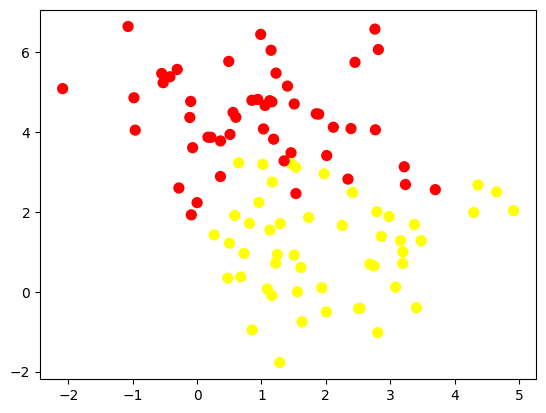

In [73]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Kode yang kamu berikan digunakan untuk menghasilkan dan memvisualisasikan dataset sederhana dengan dua kelas menggunakan `make_blobs`. Berikut adalah penjelasan lengkapnya:

1. **Mengimpor Library**:
   Sebelum menggunakan kode tersebut, pastikan kamu sudah mengimpor library yang diperlukan:
   ```python
   import numpy as np
   import matplotlib.pyplot as plt
   from sklearn.datasets import make_blobs
   ```

2. **Membuat Dataset**:
   ```python
   X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
   ```
   - `make_blobs`: Fungsi ini digunakan untuk menghasilkan dataset dengan bentuk cluster.
   - `n_samples=100`: Menghasilkan 100 titik data.
   - `centers=2`: Menghasilkan dua pusat cluster, yang berarti kita akan memiliki dua kelas.
   - `random_state=0`: Menetapkan seed untuk memastikan hasil yang dapat direproduksi.
   - `cluster_std=1.2`: Mengatur deviasi standar dari cluster. Semakin besar nilai ini, semakin besar sebaran titik di sekitar pusat.

3. **Menggambar Plot**:
   ```python
   plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
   ```
   - `plt.scatter(...)`: Membuat plot sebar untuk titik data.
   - `X[:, 0]` dan `X[:, 1]`: Mengambil kolom pertama dan kedua dari array `X` untuk sumbu x dan y.
   - `c=y`: Mengatur warna titik berdasarkan label kelas (variabel `y`).
   - `s=50`: Mengatur ukuran titik.
   - `cmap='autumn'`: Menggunakan palet warna 'autumn' untuk membedakan kelas.

Dengan menjalankan kode ini, kamu akan mendapatkan visualisasi yang menunjukkan titik-titik data yang dibentuk oleh dua cluster. Titik dari masing-masing cluster akan berwarna berbeda, memudahkan pengamatan pemisahan antara dua kelas.

Dengan kode ini, kamu bisa mendapatkan gambaran awal tentang bagaimana data terdistribusi dalam dua kelas. Ini sering menjadi langkah pertama sebelum melakukan pemodelan atau analisis lebih lanjut, seperti menggunakan algoritma klasifikasi.

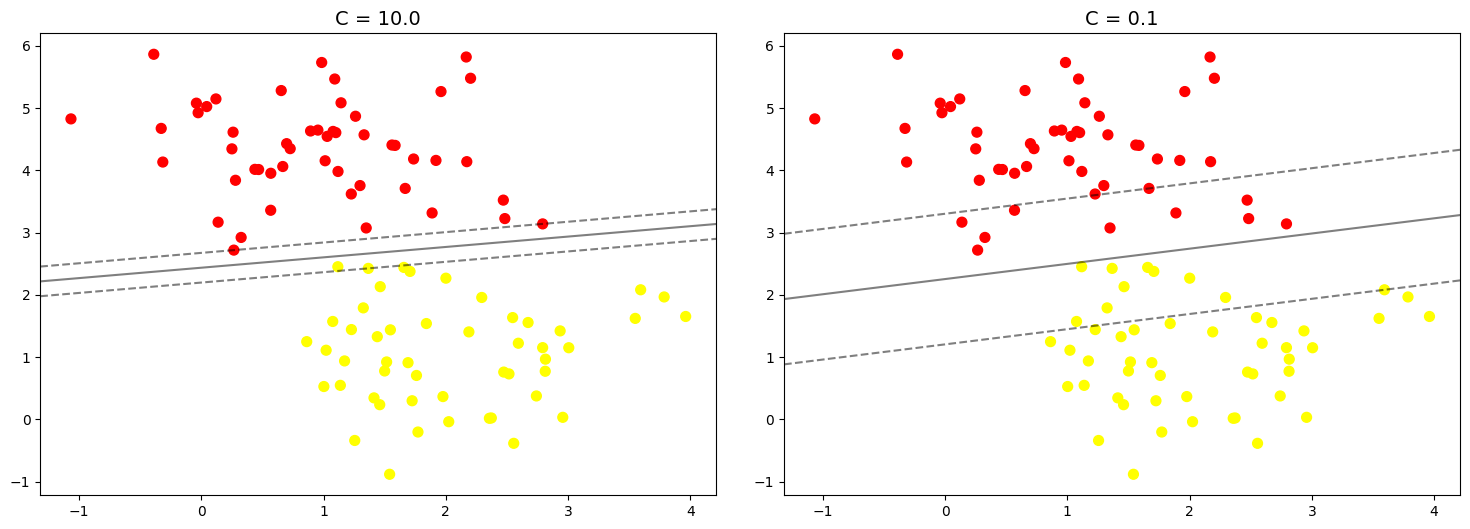

In [74]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Kode tersebut membandingkan dua model Support Vector Classifier (SVC) dengan parameter regulasi \(C\) yang berbeda (10.0 dan 0.1) untuk dataset yang dihasilkan dengan `make_blobs`. Mari kita jelaskan setiap bagian dari kode tersebut.

### Penjelasan Kode

1. **Membuat Dataset**:
   ```python
   X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
   ```
   - Menghasilkan 100 titik data dengan dua pusat cluster, menggunakan deviasi standar 0.8 untuk sebaran.

2. **Membuat Subplot**:
   ```python
   fig, ax = plt.subplots(1, 2, figsize=(16, 6))
   fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
   ```
   - Membuat dua subplot untuk membandingkan hasil dari dua model SVC.

3. **Melatih dan Memvisualisasikan Model**:
   ```python
   for axi, C in zip(ax, [10.0, 0.1]):
       model = SVC(kernel='linear', C=C).fit(X, y)
       axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
       plot_svc_decision_function(model, axi)
       axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                   s=300, lw=1, facecolors='none')
       axi.set_title('C = {0:.1f}'.format(C), size=14)
   ```
   - **Loop**: Untuk setiap subplot (`axi`) dan nilai `C` (10.0 dan 0.1):
     - Membuat model SVC dengan kernel linear dan nilai `C` yang ditentukan, lalu melatih model dengan data `X` dan label `y`.
     - Menggambar titik data dengan warna yang ditentukan oleh kelas (`c=y`).
     - Memanggil fungsi `plot_svc_decision_function(model, axi)` untuk menggambar batas keputusan.
     - Menggambar support vectors dengan ukuran yang lebih besar dan garis tepi yang jelas.
     - Mengatur judul subplot untuk menunjukkan nilai \(C\).

### Hasil yang Diharapkan
- **Subplot 1 (C = 10.0)**: Model dengan \(C\) tinggi yang berusaha memisahkan data secara lebih ketat, mungkin menghasilkan batas keputusan yang lebih kompleks dan lebih dekat dengan support vectors.
- **Subplot 2 (C = 0.1)**: Model dengan \(C\) rendah yang lebih toleran terhadap kesalahan, kemungkinan menghasilkan batas keputusan yang lebih luas dan lebih sederhana, yang mungkin tidak memisahkan kelas dengan sangat baik.

Dengan kode ini, kamu dapat melihat bagaimana parameter \(C\) memengaruhi pemisahan kelas dalam model SVC. Ini memberikan wawasan yang lebih dalam tentang bagaimana model beradaptasi terhadap data dan seberapa ketat batas keputusan yang dihasilkan.

## **üñºÔ∏è Praktikum 2**

Klasifikasi SVM Pada Data Citra

dataset yang digunakan adalah Labeled Faces in the Wild dataset (sebuah dataset yang berisi ribuan wajah publik figur).
*italicized text*
Link dataset: https://www.kaggle.com/datasets/jessicali9530/lfw-dataset



In [75]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


**Penjelasan :**

Pada variabel faces, ada kode `fetch_lfw_people()` yang merupakan fungsi dari scikit-learn yang digunakan untuk mengambil dataset LFW. Dimana dataset menyaring hanya orang-orang yang memiliki gambar wajah sebanyak 60 foto di dalamnya. KOde `print(faces.target_names)` mencetak nama-nama tokoh dari dataset yang telah diatur lalu `len()` untuk menghitung jumlah keseluruhan data, dan `print(images.shape)` untuk mencetak ukuran dari gambar.

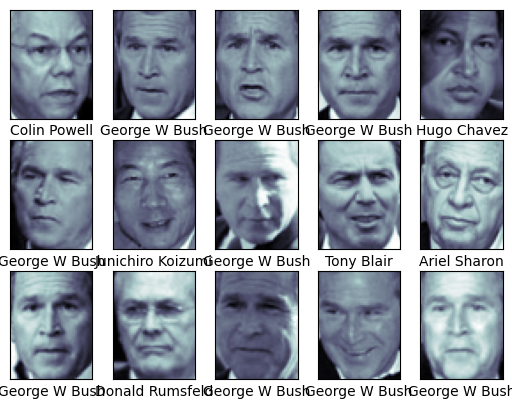

In [76]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

**Penjelasan :**

Kode di atas emetakan plot dimana x = 3 dan y = 5 untuk menampilkan gmbar wajah dari dataset LFW dan memberikan nama mereka sebagai labelnya. xticks=[] dan yticks=[] menyembunyikan skala/ticks pada sumbu X dan Y agar tampilannya lebih bersih.

Untuk kode `ax.flat` pada `for i, axi in enumerate(ax.flat):`
digunakan untuk mengubah array 2D dari subplot menjadi array 1D. Ini memudahkan iterasi dengan for dan `enumerate(ax.flat)` memberikan indeks i dan subplot axi untuk setiap elemen dalam grid subplot.



In [77]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

**Penjelasan :**

Kode di atas mengimporsvm dan scikit untuk membangun model klasifikasi. PCA digunakan untuk mereduksi dimensi. PCA dengan n_components=150 berarti hanya mempertahankan 150 komponen utama dari data gambar wajah (dimensi gambar sangat tinggi, jadi PCA mereduksinya). whiten=True memastikan bahwa komponen yang dihasilkan tidak berkorelasi dan memiliki varians yang sama, yang berguna untuk SVM.

SVM dengan kernel rbf (Radial Basis Function) digunakan karena sering kali bekerja sangat baik untuk data dengan dimensi tinggi seperti gambar. class_weight='balanced' digunakan untuk menangani ketidakseimbangan jumlah kelas di dalam dataset.

Kemudian, `make_pipeline(pca, svc)` membuat pipeline yang secara otomatis menerapkan PCA terlebih dahulu, lalu SVM untuk melakukan klasifikasi.


In [78]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

**Penjelasan:**

train_test_split digunakan untuk membagi dataset menjadi data training dan data testing.
*   Xtrain, Xtest adalah data fitur (gambar wajah)
*   ytrain, ytest adalah label target (nama orang)

random_state=42 digunakan untuk memastikan pembagian data konsisten di setiap percobaan.

In [79]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 46s, sys: 26.4 s, total: 2min 12s
Wall time: 1min 34s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


**Penjelasan:**

Kode tersebut bertujuan untuk melatih model Support Vector Machine (SVM) dengan optimasi hyperparameter menggunakan GridSearchCV. Proses utamanya adalah menemukan kombinasi parameter terbaik untuk meningkatkan performa model.

   - **`GridSearchCV`** adalah alat untuk melakukan **pencarian parameter terbaik** dengan mencoba setiap kombinasi hyperparameter yang diberikan dalam **`param_grid`**.
   - **`param_grid`** adalah kamus parameter yang ingin diuji. Dalam hal ini, parameter yang diuji adalah:
     - **`C`**: Parameter **regularisasi** dalam SVM yang mengontrol trade-off antara **overfitting** dan **underfitting**.
     - **`gamma`**: Parameter dalam kernel **Radial Basis Function (RBF)** SVM yang mengontrol seberapa jauh pengaruh dari satu contoh data terhadap keputusan model. Nilai gamma yang lebih kecil berarti pengaruh lebih luas, dan nilai lebih besar membuat pengaruh lebih lokal.
   - **`grid.fit(Xtrain, ytrain)`** melatih model SVM menggunakan **data training** (`Xtrain` untuk fitur gambar dan `ytrain` untuk label orangnya).
   - Proses ini secara otomatis mencoba berbagai kombinasi parameter yang diberikan di **`param_grid`** untuk menemukan pengaturan terbaik berdasarkan performa pada data training (biasanya dilakukan dengan **cross-validation**).
   - **`%time`** mencatat waktu yang dibutuhkan untuk proses ini (seberapa lama pencarian dan pelatihan model berlangsung).
   - **`grid.best_params_`** akan mencetak kombinasi **parameter terbaik** (nilai `C` dan `gamma`) yang menghasilkan model dengan performa terbaik.
   - **`grid.best_score_`** akan mencetak **skor terbaik** (biasanya akurasi) yang dicapai selama pencarian.

Kode ini membantu untuk meningkatkan akurasi klasifikasi wajah dengan menemukan parameter SVM yang paling optimal.

Prediksi label unutk data testing

In [80]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

**Penjelasan :**

`grid.best_estimator_` memberikan model terbaik yang diperoleh  setelah optimasi hyperparameter menggunakan GridSearchCV.
`model.predict(Xtest)` menggunakan model terbaik tersebut untuk melakukan prediksi pada data testing dan menyimpan hasil prediksinya dalam yfit.

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

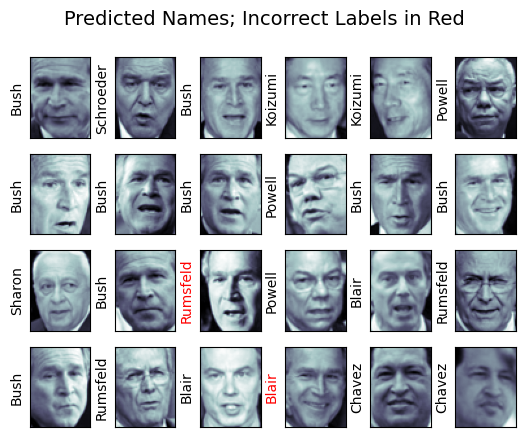

In [81]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

*   Kode di atas untuk membuat baris dan kolom untuk menampilkan gambar.

*   `ax.flat` digunakan untuk melakukan iterasi secara linear pada array 2D subplot, sehingga setiap subplot (kotak gambar) dapat diisi dengan gambar wajah.

*   `Xtest[i].reshape(62, 47):` Data wajah (Xtest[i]) memiliki bentuk vektor (1D), jadi kita reshape gambar menjadi dimensi 62x47 (dimensi asli gambar wajah).

*   `faces.target_names[yfit[i]].split()[-1]:` Menampilkan nama belakang (split mengambil bagian terakhir dari nama) dari label prediksi yfit[i].

*   `color='black' if yfit[i] == ytest[i] else 'red':`
Jika prediksi benar (yfit sama dengan ytest), label ditampilkan dalam warna hitam. Jika prediksi salah, label ditampilkan dalam warna merah

In [82]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



*    fungsi classification_report dari modul sklearn.metrics untuk menghasilkan laporan klasifikasi yang berisi metrik evaluasi seperti precision, recall, f1-score, dan support untuk setiap kelas.

*    `classification_report(ytest, yfit):`
ytest: label sebenarnya (ground truth) dari data testing.
yfit: label yang diprediksi oleh model.

*    target_names=faces.target_names: Menyediakan nama kelas (dalam hal ini, nama-nama orang yang dikenali) yang akan ditampilkan dalam laporan, sehingga hasil lebih mudah dipahami.


Text(113.92222222222219, 0.5, 'predicted label')

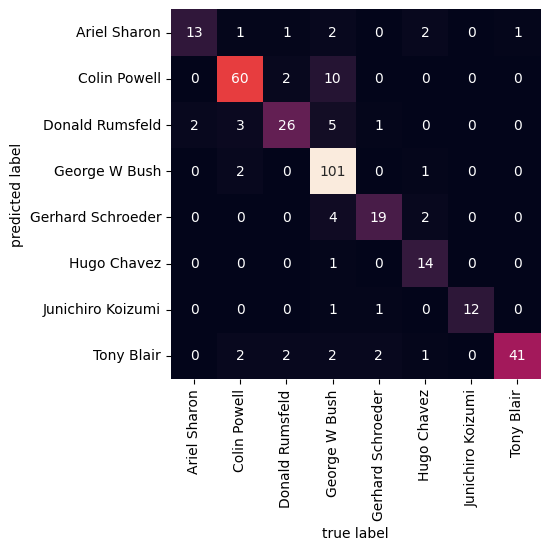

In [83]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

confusion_matrix(ytest, yfit) untuk menghitung confusion matrix dengan membandingkan label yang sebenarnya (ytest) dengan label yang diprediksi oleh model (yfit). Dimana hasilnya, mat adalah matriks yang menunjukkan jumlah prediksi benar dan salah untuk setiap kelas.

sns.heatmap(): Menggunakan Seaborn untuk membuat heatmap dari confusion matrix yang telah dihitung.
*   mat.T: Transpose matriks untuk mempermudah pemahaman label
*   square=True: Membuat setiap sel dalam heatmap berbentuk kotak.
*   annot=True: Menambahkan angka ke dalam sel yang menunjukkan jumlah prediksi.
*   fmt='d': Menampilkan angka dalam format integer.
*   cbar=False: Menonaktifkan color bar di samping heatmap.
*   xticklabels=faces.target_names: Menetapkan nama target pada sumbu X (label yang benar).
*   yticklabels=faces.target_names: Menetapkan nama target pada sumbu Y (label yang diprediksi).




## **üß´ Praktikum 3**

Klasifikasi Naive Bayes dengan Data Dummy

Untuk membuat data dummy dapat menggunakan fungsi make_classification dari library scikit-learn. Lalu *membuat* model Multinomial Naive Bayes dengan menggunakan MultinomialNB dan model Gaussian Naive Bayes menggunakan GaussianNB

 **Mendefinisikan data dummy**

In [84]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[142 155]
 [143 136]
 [ 53  56]
 [208 183]
 [ 79  87]
 [ 13  18]
 [ 27  17]
 [110 114]
 [ 16  91]
 [ 91 168]
 [268 240]
 [  9  71]
 [ 86  43]
 [ 73  84]
 [115  71]
 [ 45  71]
 [227  25]
 [  1 208]
 [106  84]
 [151 162]
 [ 67 152]
 [ 96 119]
 [223   9]
 [ 25  69]
 [159 109]
 [213  73]
 [ 67 123]
 [112 109]
 [ 12 123]
 [ 15 188]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


Kode di atas membuat data sintetis: menghasilkan 30 sampel dengan 2 fitur dan 2 kelas. Setelah itu data diproses dengan mengambil nilai absolut dari X (fitur), membulatkan ke 2 angka desimal dan mengalikan dengan 100, serta mengonversi ke tipe integer

 **Membuat data frame**

In [85]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

Fitur 1  Fitur 2  Label
0      142      155      0
1      143      136      0
2       53       56      0
3      208      183      0
4       79       87      0

Kode di atas mengubah data pada sumbu y dari 1D menjadi 2D menggunakan reshape sehingga bisa digabungkan dengan data fitur x. `np.concatenate` untuk menggabungkan fitur X dan label y_new menjadi satu array 2D. Baru menentukan nnama kolom untuk data frame dan membuat df dengan kode `df = pd.DataFrame(data, columns=nama_kolom)`

In [86]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

Fitur 1  Fitur 2    Label
0      142      155  Kelas B
1      143      136  Kelas B
2       53       56  Kelas B
3      208      183  Kelas B
4       79       87  Kelas B

Membuat nama label dan mengcopy dataframe. pada kode `df_label['Label'] = df_label['Label'].map(labels)` menggunakan map dari Pandas untuk mengganti nilai/angka dalam kolom 'Label' di df_label dengan label yang sesuai dari dictionary labels.


**Visualisasi Data**

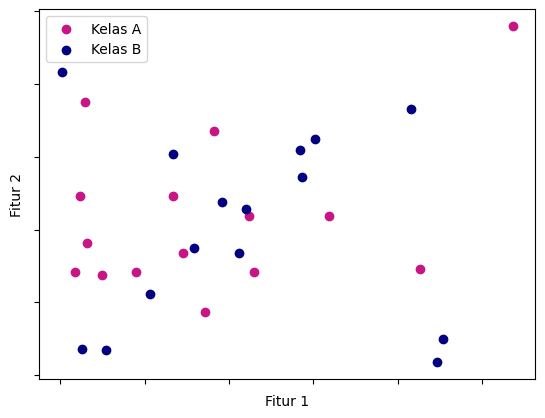

In [87]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

Kode di atas mengelompokkan DataFrame df_label berdasarkan kolom 'Label' untuk memisahkan data antara 'Kelas A' dan 'Kelas B' Lalu, menggunakan plt.scatter untuk membuat scatter plot. Data dari 'Kelas A' dan 'Kelas B' diplot dengan warna yang telah ditentukan

**Klasifikasi Multinomial Naive Bayes**

In [88]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.6190476190476191
Hasil akurasi data test: 0.6666666666666666


Kode di atas membangun model klasifikasi menggunakan Naive Bayes, membagi data menjadi pelatihan (70%) dan pengujian (30%), melatih model, dan kemudian mempredeksi dan mengevaluasi akurasinya pada kedua set data.

**Klasifikasi Gaussian Naive Bayes**

In [89]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.6190476190476191
Hasil akurasi data test (Gaussian): 0.5555555555555556


Kode di atas membangun model klasifikasi menggunakan Gaussian Naive Bayes, melatih model dengan data pelatihan, dan mengevaluasi akurasinya pada kedua set data (pelatihan dan pengujian). Dengan membandingkan hasil akurasi model ini dengan model sebelumnya, kita dapat mengevaluasi efektivitas masing-masing metode klasifikasi terhadap dataset yang sama

## **üìÑ Praktikum 4 (Opsional)**

Klasifikasi Naive Bayes Pada Data Multinomial

**Load Data**

In [90]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

**Pra-pengolahan Data**

**a. Drop Kolom**

In [91]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

**b. Ubah Nama Kolom V1 dan V2**

In [92]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

Labels                                                SMS
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...

**Inspeksi Data**

In [93]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


**Encode Label**

In [94]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

Labels                                                SMS
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

Memisahkan Fitur dengan Label

In [95]:
X = df['SMS'].values
y = df['Labels'].values

**Ekstraksi fitur**

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

In [97]:
print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')

7727
Dimensi data: (4457, 7727)


In [98]:
print(bow.get_feature_names_out())

['00' '000' '000pes' ... '√ª√Øharry' '√ª√≤' '√ª√≥well']


In [99]:
print(bow.get_feature_names_out()[:1000])

['00' '000' '000pes' '008704050406' '0089' '01223585334' '0125698789' '02'
 '0207' '02072069400' '02073162414' '021' '03' '04' '0430' '05' '050703'
 '0578' '06' '07' '07008009200' '07046744435' '07090201529' '07123456789'
 '0721072' '07732584351' '07734396839' '07742676969' '07753741225'
 '0776xxxxxxx' '07781482378' '07786200117' '077xxx' '07808' '07808247860'
 '07815296484' '07821230901' '07880867867' '0789xxxxxxx' '07946746291'
 '0796xxxxxx' '07973788240' '07xxxxxxxxx' '08' '0800' '08000407165'
 '08000776320' '08000839402' '08000930705' '08000938767' '08001950382'
 '08002888812' '08002986030' '08002986906' '08002988890' '08006344447'
 '0808' '08081263000' '08081560665' '0825' '083' '0844' '08448350055'
 '08448714184' '0845' '08452810071' '08452810073' '08452810075over18'
 '0870' '08700435505150p' '08701213186' '08701417012' '08701417012150p'
 '0870141701216' '087016248' '08701752560' '087018728737' '0870241182716'
 '08702490080' '08702840625' '08704050406' '08704439680' '08704439680t

**Training dan Evaluasi Model**

In [100]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.9946152120260264
Hasil akurasi data test: 0.9775784753363229


## **üåÉ Praktikum 5**

Klasifikasi Citra Siang dan Malam

In [129]:
import zipfile
import os

# Nama file ZIP yang di-upload
zip_file_path = '/content/images.zip'

# Direktori tempat file akan diekstrak
extract_to_path = '/content'

# Membuat direktori tujuan jika belum ada
# os.makedirs(extract_to_path, exist_ok=True)

# Ekstrak file ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print(f"File berhasil diekstrak ke: {extract_to_path}")


File berhasil diekstrak ke: /content


In [130]:
import shutil

# Path folder yang ingin dihapus
folder_path = '/content/__MACOSX'

# Menghapus folder dan seluruh isinya
if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"Folder {folder_path} beserta isinya berhasil dihapus.")
else:
    print(f"Folder {folder_path} tidak ditemukan.")


Folder /content/__MACOSX beserta isinya berhasil dihapus.


**Langkah 0 - Import Library**

In [131]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

matplotlib.image (alias mpimg): Digunakan untuk membaca dan memproses gambar. Ini adalah bagian dari pustaka Matplotlib, yang biasa digunakan untuk visualisasi data.

In [132]:
# Image directories
train_dir = "images/training/"
test_dir = "images/test/"

Menyimpan  path ke variabel

 **Langkah 1 - Load Data dan Visualisasikan**

In [133]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [134]:
# load training data (img)
train_img = load_dataset(train_dir)

train_img = load_dataset(train_dir) untuk memanggil fungsi load_dataset dengan train_dir untuk memuat gambar pelatihan dan menyimpannya dalam variabel train_img.

In [135]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[ 90, 135, 192],
         [ 69, 114, 171],
         [ 63, 108, 165],
         ...,
         [ 64, 101, 145],
         [ 64, 101, 145],
         [ 63, 100, 144]],
 
        [[ 89, 134, 191],
         [ 68, 113, 170],
         [ 63, 108, 165],
         ...,
         [ 66, 103, 147],
         [ 66, 103, 147],
         [ 66, 103, 147]],
 
        [[ 88, 133, 190],
         [ 68, 113, 170],
         [ 63, 108, 165],
         ...,
         [ 67, 104, 148],
         [ 67, 104, 148],
         [ 68, 105, 149]],
 
        ...,
 
        [[ 61,  35,  12],
         [ 58,  34,  10],
         [ 55,  30,   8],
         ...,
         [ 18,  11,   1],
         [ 15,  11,   2],
         [ 17,  13,   4]],
 
        [[ 57,  35,  14],
         [ 58,  36,  15],
         [ 54,  32,  11],
         ...,
         [ 20,  13,   3],
         [ 17,  13,   4],
         [ 22,  18,   9]],
 
        [[ 55,  34,  15],
         [ 55,  37,  17],
         [ 52,  34,  14],
         ...,
         [ 19,  12,   2],
  

train_img[0] mengakses elemen pertama dari daftar gambar yang dimuat, berupa tuple yang terdiri dari array gambar dan label-nya

In [136]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 196
(372, 640, 3)


Menghasilkan angka acak dari rentang jumlah banyaknya gambar. Lali mencetak indeks gambar dan `print(train_img[pick_random][0].shape)` untuk mengakses elemen di train_img pada indeks pick_random dan mengambil gambar (elemen pertama dari tuple, yang merupakan array gambar) dan .shape untuk mendapatkan ukuran (dimensi) gambar.

In [137]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

*   parameter img_list merupakan daftar gambar yang dimuat sebelumnya, di mana setiap elemen adalah tuple berisi gambar dan labelnya.

*   rand_num = np.random.randint(0, len(img_list)) menghasilkan angka acak (rand_num) dalam rentang dari 0 hingga panjang img_list, yang digunakan sebagai indeks untuk memilih gambar secara acak.

*   img = img_list[rand_num][0]: mengakses gambar yang dipilih menggunakan indeks acak.

*   label = img_list[rand_num][1]: mengakses label yang sesuai untuk gambar yang dipilih.

*   label_str = 'day' if label == 1 else 'night': untuk apakah label adalah 'day' atau 'night'

*   untuk sisanya hanya untuk menampilkan

Shape	: (700, 1280, 3)
Label	: night


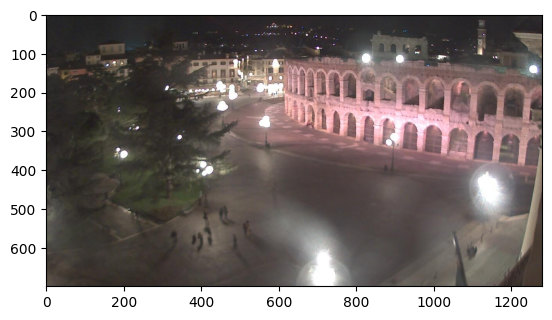

In [138]:
random_img_viz(train_img)

fungsi `random_img_viz` dengan train_img, yang akan memilih dan menampilkan gambar acak beserta informasi dimensinya dan labelnya.


**Langkah 3 - Pra Pengolahan Data**

In [139]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

fungsi untuk meresize ukuran image menjadi pixel yang sudah ditentukan

In [140]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

fungsi ini digunakan untuk mengencode label dari string ('day' atau 'night') menjadi nilai numerik (1 untuk 'day' dan 0 untuk 'night') dan akan direturn


In [141]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

fungsi ini digunakan untuk memproses seluruh daftar gambar dan label, mengubah ukuran gambar dan mengencode label. menyimpan nilai image dan label kemudian menstandarisasi/emngubah ukuran menggunakan fungsi standarized. selanjutnya, membuat label menggunakan fungsi label_encoder yang sebelumnya sudah dideklarasikan, kemudian hasilnya untuk label dan gambar akan ditambahkan ke dalam std_img_list array

In [142]:
train_std_img_list = preprocess(train_img)

memanggil fungsi preprocess dengan train_img untuk memproses dataset pelatihan, menyimpan hasilnya dalam train_std_img_list

In [143]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 33
(600, 1100, 3)


menghasilkan indeks acak untuk memilih gambar dari dataset yang sudah ditrain

Shape	: (600, 1100, 3)
Label	: 1


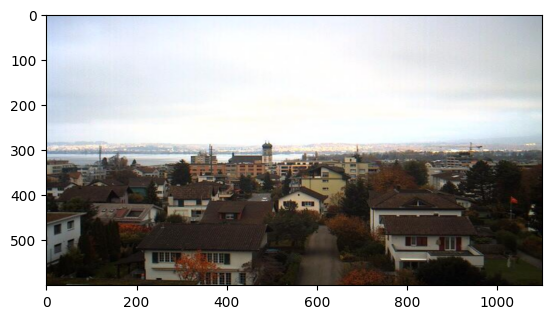

In [144]:
random_img_viz(train_std_img_list)

untuk menampilkan gambar beserta informasi ukurannya

**Langkah 4 - Ekstraksi Fitur**

In [145]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

fungsi tersebut digunakan untuk menghasilkan nilai rata-rata kecerahannya. sum_brightness = np.sum(img_hsv[:,:,2]) untuk enghitung total kecerahan dengan menjumlahkan semua nilai dalam kanal V (yang ada di indeks ke-2 dari array 3D img_hsv). dimana hasil sum akan dibagi dengan luas area image

Image 10
Avg Brighness: 116.6685


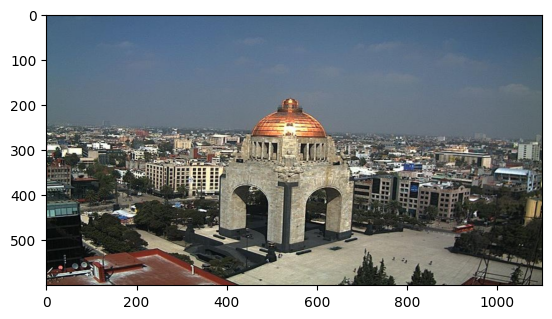

In [146]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

Kode di atas menghasilkan angka random dan mengakses data pada train_std_img_list pada index sesuai angka random tadi, kemudian memanggil fungsi avg_brightness untuk mengetahui brp rata-rata brightnessnya. setelah itu menampilkan gambar dalam plt

**Langkah 5 - Klasifikasi dengan Metode Threshold**

In [147]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

fungsi ini digunakan untuk memprediksi label gambar (0 atau 1) berdasarkan kecerahan rata-rata gambar dan ambang batas (threshold) yang diberikan.



Image 236
Actual label: 0
Predicted label: 0


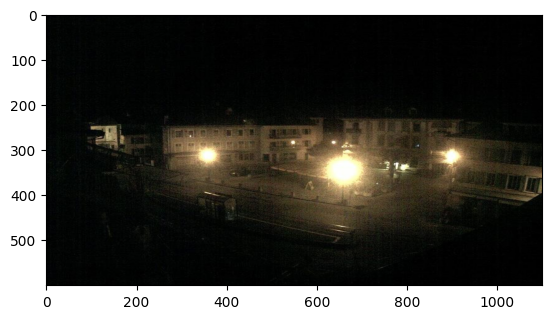

In [148]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

Kode di atas merandom angka sebagai indeks gambar yg akan digunakan dan kemudian memanggil fungsi predict_label dengan threshold sebesar 120.

**Langkah 6 - Evaluasi (Manual)**

In [149]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

fungsi ini digunakan untuk mengevaluasi kinerja prediksi pada seluruh daftar gambar dan menghitung akurasi model berdasarkan ambang batas yang diberikan. jadi, akan mencocokkan antara label dengan predict label. jika hasil tidak cocok, maka akan gambar dan label akan disimpan dalam miss_label dan ada perhitungan akurasi dengan membagi jumlah prediksi yang benar dengan total  



In [150]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


evaluate(train_std_img_list, threshold=120) berarti memanggil fungsi evaluate untuk mengevaluasi model pada data pelatihan. Ambang batas kecerahan yang digunakan untuk klasifikasi adalah 120.

In [151]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


`load_dataset(test_dir)` memanggil fungsi load_dataset untuk memuat gambar dari direktori pengujian (test_dir). preprocess(test_img) memanggil fungsi preprocess untuk melakukan strandarisasi gambar menggunakan fungsi standarized_input, serta encodering label. sertaa mengevaluasi model pada data pengujian dengan threshold 120


**Another Way - Membuat Feature Vectors dan Klasifikasi dengan SVM**

**Langkah 4 alternatif - Membuat Feature Vectors**

In [152]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

*   fungsi ini menerima img_list, yaitu daftar gambar yang telah diproses dalam bentuk tuple, kemudian dari setiap gambar akan dihitung kecerahan rata-rata (lalu dimasukkan ke variabel avg_list) dan get label (lalu dimasukkan ke array labels).

*   `np.column_stack((avg_list, labels))` untuk menyusun data avg_list (fitur) dan labels (label) menjadi dua kolom yang sejajar.

*   `pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])` membuat DataFrame Pandas dari data yang disusun, dengan kolom AVG_BRIGHT dan LABELS

In [153]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


AVG_BRIGHT  LABELS
0  159.210865     1.0
1  107.358529     1.0
2  138.835189     1.0
3  187.700786     1.0
4  110.299155     1.0

memanggil fungsi extract_avg_bright_feature yg sebelumnya sudah dibuat menggunakan data train dan menampilkan hasilnya

In [154]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


AVG_BRIGHT  LABELS
0  149.179342     1.0
1  188.119652     1.0
2  123.281580     1.0
3  132.243377     1.0
4  126.723102     1.0

memanggil fungsi extract_avg_bright_feature yg sebelumnya sudah dibuat menggunakan data test dan menampilkan hasilnya

**Langkah 5 - Alternatif**

In [155]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

*   X_train dan X_test merupakan fitur untuk data pelatihan dan pengujian. Kamu mengambil kolom pertama dari DataFrame (AVG_BRIGHT), yang berisi rata-rata kecerahan gambar. Data ini diubah bentuknya `(reshape(-1,1))` karena diperlukan dalam format 2D untuk model SVM.

*   y_train dan y_test merupakan label untuk data pelatihan dan pengujian, yang diambil dari kolom kedua (LABELS) di DataFrame

*   SVC(): Membuat objek model Support Vector Classifier. Kemudian, kode `model.fit(X_train, y_train)` digunakan untuk melatih model menggunakan data pelatihan X_train (rata-rata kecerahan) dan y_train (label).


**Langkah 6 ALternatif**

In [156]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


*   `y_test_pred = model.predict(X_test)` model melakukan prediksi pada data pengujian. prediksi pada data train jg dilakukan

*   `accuracy_score(y_test, y_test_pred)` untuk menghitung akurasi dengan membandingkan prediksi y_test_pred dengan label sebenarnya y_test untuk data pengujian. untuk data train jg dilakukan hal yang sama

*   mencetak hasil akurasi


## **üíª Tugas 1 (Opsional)**

1.   Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv.

2.   Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

      *   Menggunakan data spam.csv
      *   Fitur CountVectorizer dengan mengaktifkan stop_words
      *   Evaluasi hasilnya

3.   Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

      *   Menggunakan data spam.csv
      *   Fitur TF-IDF dengan mengaktifkan stop_words
      *   Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
      *   Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

**No 1 Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv**

Import library

In [157]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Memuat data

In [158]:
# Load Data
data = pd.read_csv('data/voice.csv')

# baca data
data.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  

[5 rows x 21 columns]

Membagi data

In [159]:
# bagi data menjadi fitur x dan y
X = data.drop('label', axis=1)  #memisahkan fitur
y = data['label']  #kolom target

#membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Skala fitur

In [160]:
#skala Fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Trrain and result

In [161]:
#melatih model svm
model = SVC(kernel='linear')
model.fit(X_train, y_train)

#evaluasi Model
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

akurasi = accuracy_score(y_test, y_pred)
print("Akurasi SVM:", akurasi)

              precision    recall  f1-score   support

      female       0.96      0.99      0.98       297
        male       0.99      0.97      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

Akurasi SVM: 0.9763406940063092


Model SVM menunjukkan akurasi tinggi, menandakan efektivitasnya dalam klasifikasi suara.

**No 2 Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan:**

      *   Menggunakan data spam.csv
      *   Fitur CountVectorizer dengan mengaktifkan stop_words
      *   Evaluasi hasilnya


In [182]:
# Langkah 1: Memuat Data
import pandas as pd
from sklearn.model_selection import train_test_split

# Ganti 'spam.csv' dengan path file Anda
data = pd.read_csv('data/spam.csv', encoding='latin-1')

# Tampilkan beberapa baris dari dataset
print(data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [183]:
# Langkah 2: Prabersihan Data
# Menghapus kolom yang tidak diperlukan
data = data[['v1', 'v2']]
data.columns = ['label', 'text']

# Memastikan label dalam format biner
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

<ipython-input-183-cb2a94a3fb6e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].map({'ham': 0, 'spam': 1})


In [184]:
print(data.head())

   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [185]:
# Langkah 3: Membagi Data
from sklearn.model_selection import train_test_split
X = data['text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [186]:
# Langkah 4: Menggunakan CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [188]:
# Langkah 5: Melatih Model Naive Bayes
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_counts, y_train)

# Langkah 6: Evaluasi Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_train = model.predict(X_train_counts)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred_test = model.predict(X_test_counts)
accuracy_test = accuracy_score(y_test, y_pred_test)

report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print hasil evaluasi
print(f'Akurasi data train: {accuracy_train:.4f}')
print(f'Akurasi data test: {accuracy_test:.4f}')
print(f'Classification Report:\n{report}')
print("\nConfusion Matrix:\n", conf_matrix)

Akurasi data train: 0.9946
Akurasi data test: 0.9839
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix:
 [[959   6]
 [ 12 138]]


**Kesimpulan**

*   Akurasi: Model mencapai akurasi 99.46% pada data train dan 98.30% pada data test, menunjukkan performa yang sangat baik dalam klasifikasi SMS. Namun, ada penurunan kecil dalam akurasi antara data latih dan data uji, yang menunjukkan bahwa model mungkin sedikit overfitting

*   Kinerja: Sangat efektif dalam mendeteksi "ham" (Recall 1.00) dan cukup baik untuk "spam" (Recall 0.90).

*   Keseimbangan: Meskipun model baik dalam mendeteksi "ham", ada ruang untuk meningkatkan deteksi "spam" agar lebih seimbang.


**No 3 Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan**

      *   Menggunakan data spam.csv
      *   Fitur TF-IDF dengan mengaktifkan stop_words
      *   Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
      *   Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

In [40]:
# Langkah 1: Memuat Data
import pandas as pd

# Ganti 'spam.csv' dengan path file Anda
data = pd.read_csv('data/spam.csv', encoding='latin-1')

# Langkah 2: Prabersihan Data
# Menghapus kolom yang tidak diperlukan
data = data[['v1', 'v2']]
data.columns = ['label', 'text']

# Tampilkan beberapa baris dari dataset
print(data.head())

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [41]:
# Memastikan label dalam format biner
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Tampilkan beberapa baris dari dataset
print(data.head())

   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [37]:
# Langkah 3: Membagi Data
from sklearn.model_selection import train_test_split
X = data['text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Langkah 4: Menggunakan TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_method = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_method.fit_transform(X_train)
X_test_tfidf = tfidf_method.transform(X_test)

# Langkah 5: Melatih Model Naive Bayes
from sklearn.naive_bayes import MultinomialNB

model_tfidf = MultinomialNB()
model_tfidf.fit(X_train_tfidf, y_train)

# Langkah 6: Evaluasi Model
from sklearn.metrics import accuracy_score, classification_report

y_pred_tfidf = model_tfidf.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Akurasi: {accuracy}')
print(f'Classification Report:\n{report}')
print("\nConfusion Matrix:\n", conf_matrix)

Akurasi: 0.968609865470852
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115


Confusion Matrix:
 [[965   0]
 [ 35 115]]


Akurasi model baru menunjukkan penurunan dibandingkan dengan model sebelumnya, dari 98.39% menjadi 96.86%. Hal ini menunjukkan bahwa model baru mungkin tidak sebaik model sebelumnya dalam menggeneralisasi data uji. Namun, model baru gagal mengidentifikasi lebih banyak kasus positif.

**Kesimpulan umum**

Dalam konteks klasifikasi data spam, tujuan utama adalah untuk meminimalkan baik false positives (mengklasifikasikan email non-spam sebagai spam) dan false negatives (mengklasifikasikan email spam sebagai non-spam). Oleh karena itu, evaluasi model yang lebih dalam diperlukan.

Model pertama menunjukkan kinerja yang lebih baik dalam mendeteksi spam (kelas 1 = spam) dengan akurasi, recall, dan F1-score yang lebih tinggi. Ini sangat penting dalam konteks spam karena lebih baik mendeteksi email spam meskipun ada beberapa kesalahan dalam mengidentifikasi email non-spam. Untuk TF-IDF dapat berguna untuk aplikasi di mana false positives harus dihindari sama sekali, tetapi dengan risiko kehilangan banyak email spam.



## **üíª Tugas 2**

Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [49]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [50]:
train_dir = "images/training/"
test_dir = "images/test/"

train_img = load_dataset(train_dir)
test_img = load_dataset(test_dir)

In [51]:
def extract_histogram_features(img_list, bins=32):
    hist_features = []
    labels = []

    for img, label in img_list:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        hist = cv2.calcHist([gray_img], [0], None, [bins], [0, 256])
        hist = cv2.normalize(hist, hist).flatten()

        hist_features.append(hist)
        labels.append(label)

    df = pd.DataFrame(hist_features)
    df['LABELS'] = labels

    return df

In [52]:
train_hist_img = extract_histogram_features(train_img)
test_hist_img = extract_histogram_features(test_img)

In [53]:
X_train = train_hist_img.drop(columns=['LABELS']).values
y_train = train_hist_img['LABELS']

X_test = test_hist_img.drop(columns=['LABELS']).values
y_test = test_hist_img['LABELS']

In [54]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [55]:
y_train_pred = model.predict(X_train)   # Prediksi data latih
train_accuracy = accuracy_score(y_train, y_train_pred)  # Evaluasi akurasi data latih

y_test_pred = model.predict(X_test) # Prediksi data uji
test_accuracy = accuracy_score(y_test, y_test_pred)   # Evaluasi akurasi data uji

In [58]:
print(f'Accuracy on training data: {train_accuracy}')
print(f'Accuracy on test data: {test_accuracy}')
print(classification_report(y_test, y_test_pred))

Accuracy on training data: 1.0
Accuracy on test data: 0.96875
              precision    recall  f1-score   support

         day       0.97      0.96      0.97        80
       night       0.96      0.97      0.97        80

    accuracy                           0.97       160
   macro avg       0.97      0.97      0.97       160
weighted avg       0.97      0.97      0.97       160

